In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
nx = 572
ny = 572

In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)


In [5]:
x_test, y_test = generator(1)
#print (type (generator(1)))
print (generator(4)[1].shape)
print (generator(4)[0].shape)
#print (generator(1)[0][:,2,1,0])
#generator(1)[0]

(4, 572, 572, 2)
(4, 572, 572, 1)


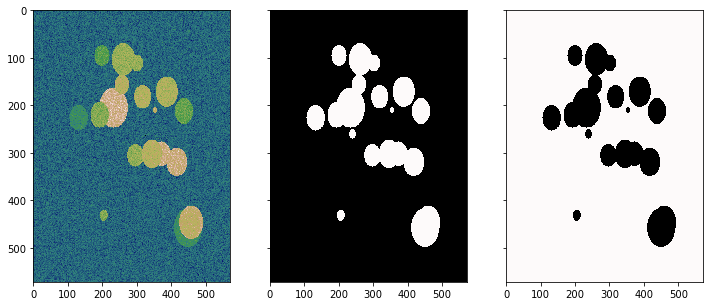

In [6]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
ax[2].imshow(y_test[0,...,0], aspect="auto")
#print (y_test[0,504,:,0])

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2017-08-22 15:49:10,465 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [8]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [9]:
path = trainer.train(generator, "./toy_result/unet_trained", training_iters=20, epochs=10, display_step=2)

2017-08-22 15:49:11,506 Removing '/home/mri/Desktop/to_wanglin/brain_seg/prediction'
2017-08-22 15:49:11,507 Removing '/home/mri/Desktop/to_wanglin/brain_seg/toy_result/unet_trained'
2017-08-22 15:49:11,523 Allocating '/home/mri/Desktop/to_wanglin/brain_seg/prediction'
2017-08-22 15:49:11,524 Allocating '/home/mri/Desktop/to_wanglin/brain_seg/toy_result/unet_trained'


ResourceExhaustedError: OOM when allocating tensor with shape[4,570,570,16]
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Reshape, Variable/read)]]
	 [[Node: div_1/_9 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_573_div_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Conv2D', defined at:
  File "/home/mri/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/mri/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mri/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mri/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/mri/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/mri/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/mri/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/mri/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-778ffd89a317>", line 1, in <module>
    net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)
  File "/home/mri/Desktop/to_wanglin/brain_seg/tf_unet/unet.py", line 191, in __init__
    logits, self.variables, self.offset = create_conv_net(self.x, self.keep_prob, channels, n_class, **kwargs)
  File "/home/mri/Desktop/to_wanglin/brain_seg/tf_unet/unet.py", line 88, in create_conv_net
    conv1 = conv2d(in_node, w1, keep_prob)
  File "/home/mri/Desktop/to_wanglin/brain_seg/tf_unet/layers.py", line 36, in conv2d
    conv_2d = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='VALID', use_cudnn_on_gpu = True)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 399, in conv2d
    data_format=data_format, name=name)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/mri/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[4,570,570,16]
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Reshape, Variable/read)]]
	 [[Node: div_1/_9 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_573_div_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
x_test, y_test = generator(1)

prediction = net.predict("./toy_result/unet_trained/model.cpkt", x_test)

In [ ]:
print (type(prediction))
print (prediction.shape)
print (x_test.shape)
plt.imshow(prediction[0,...,0])

In [ ]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
#fig.savefig("docs/toy_problem.png")
len(ax)
